Exercis 2_1

In [3]:
from sklearn.linear_model import LogisticRegression,Ridge,SGDClassifier
from sklearn.svm import LinearSVC
import sklearn.metrics as mc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from mlxtend.plotting import plot_decision_regions


In [5]:
#Load data from .mat files 108:fault data
data100 = scipy.io.loadmat('/content/drive/MyDrive/data set/100.mat.txt')
data108 = scipy.io.loadmat('/content/drive/MyDrive/data set/108.mat.txt')

print(data100.keys())
print(data108.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X100_DE_time', 'X100_FE_time', 'X100RPM'])
dict_keys(['__header__', '__version__', '__globals__', 'X108_DE_time', 'X108_FE_time', 'X108_BA_time', 'X108RPM'])


In [7]:
normal = data100['X100_DE_time']
fault1 = data108['X108_DE_time']
print(f'number of data in X108_DE_time(fault) :{fault1.size}')
print(f'number of data in X100_DE_time(normal) :{normal.size}')

number of data in X108_DE_time(fault) :122917
number of data in X100_DE_time(normal) :485643


In [8]:
print(normal.shape)

print(fault1.shape)


(485643, 1)
(122917, 1)


In [9]:
N = 300
M = 150
C1 = np.array([normal[N * i:N * (i + 1)] for i in range(M)]).reshape(N, M)
C2 = np.array([fault1[N * i:N * (i + 1)] for i in range(M)]).reshape(N, M)
print(C1.shape)
print(C2.shape)


(300, 150)
(300, 150)


In [10]:
X = np.vstack((C1, C2))
X.shape

(600, 150)

Exercis 2_2

In [13]:
# Feature Extraction
data_std = np.std(X, axis=1, keepdims=True)
data_rms = np.sqrt(np.mean(np.square(X), axis=1)).reshape(-1, 1)
data_skewness= np.mean(((X - np.mean(X, axis=1, keepdims=True)) ** 3) / (np.std(X, axis=1, keepdims=True) ** 3), axis=1).reshape(-1, 1)
data_crest_factor=np.max(np.abs(X), axis=1).reshape(-1, 1) / np.sqrt(np.mean(np.square(X), axis=1)).reshape(-1, 1)
data_absolute_mean=np.mean(np.abs(X), axis=1).reshape(-1, 1)
data_square_mean_root = np.square(np.mean(np.sqrt(np.abs(X)), axis=1)).reshape(-1, 1)

X_new = np.hstack([data_std, data_rms,data_skewness,data_crest_factor,data_absolute_mean,data_square_mean_root])


In [15]:
y = np.vstack((0*np.ones((N, 1)), 1 * np.ones((N, 1))))


In [16]:
def data_split(X, per):
    limit = int(len(X) * per)
    idx = np.random.permutation(len(X))
    return idx[:limit], idx[limit:]

d_train = 0.8
i_train1, i_test1 = data_split(X_new[:N], d_train)
i_train2, i_test2 = data_split(X_new[N:], d_train)


In [17]:
C1_train, C1_test = X_new[:N][i_train1], X_new[:N][i_test1]
C2_train, C2_test = X_new[N:][i_train2], X_new[N:][i_test2]

X_train = np.vstack((C1_train, C2_train))
y_train = np.vstack((np.ones((len(C1_train), 1)), 2 * np.ones((len(C2_train), 1))))
X_test = np.vstack((C1_test, C2_test))
y_test = np.vstack((np.ones((len(C1_test), 1)), 2 * np.ones((len(C2_test), 1))))

print('data_1 X_train: ', X_train.shape)
print('data 1 y_train: ', y_train.shape)
print('data_2 X_test: ', X_test.shape)
print('data_2 y_test: ', y_test.shape)


data_1 X_train:  (480, 6)
data 1 y_train:  (480, 1)
data_2 X_test:  (120, 6)
data_2 y_test:  (120, 1)


In [18]:
def Preprocessing(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


X_train = Preprocessing(X_train)
X_test = Preprocessing(X_test)

print(X_train.shape)
print(X_test.shape)


(480, 6)
(120, 6)


In [23]:
train_df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))), columns=[f'Feature {i+1}' for i in range(X_train.shape[1])] + ['Label'])
test_df = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))), columns=[f'Feature {i+1}' for i in range(X_test.shape[1])] + ['Label'])

train_df.to_csv('/content/drive/MyDrive/data set/train_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/data set/test_data.csv', index=False)



In [20]:
print(test_df.shape)
print(test_df.columns)

(120, 7)
Index(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
       'Feature 6', 'Label'],
      dtype='object')


In [24]:
df_test = pd.read_csv('/content/drive/MyDrive/data set/test_data.csv')
df_train = pd.read_csv('/content/drive/MyDrive/data set/train_data.csv')


In [25]:
df_test.columns = ['data_std', 'data_rms', 'data_skewness', 'data_crest_factor', 'data_absolute_mean','data_square_mean_root', 'label']


In [26]:
df_train.columns = ['data_std', 'data_rms', 'data_skewness', 'data_crest_factor', 'data_absolute_mean','data_square_mean_root', 'label']


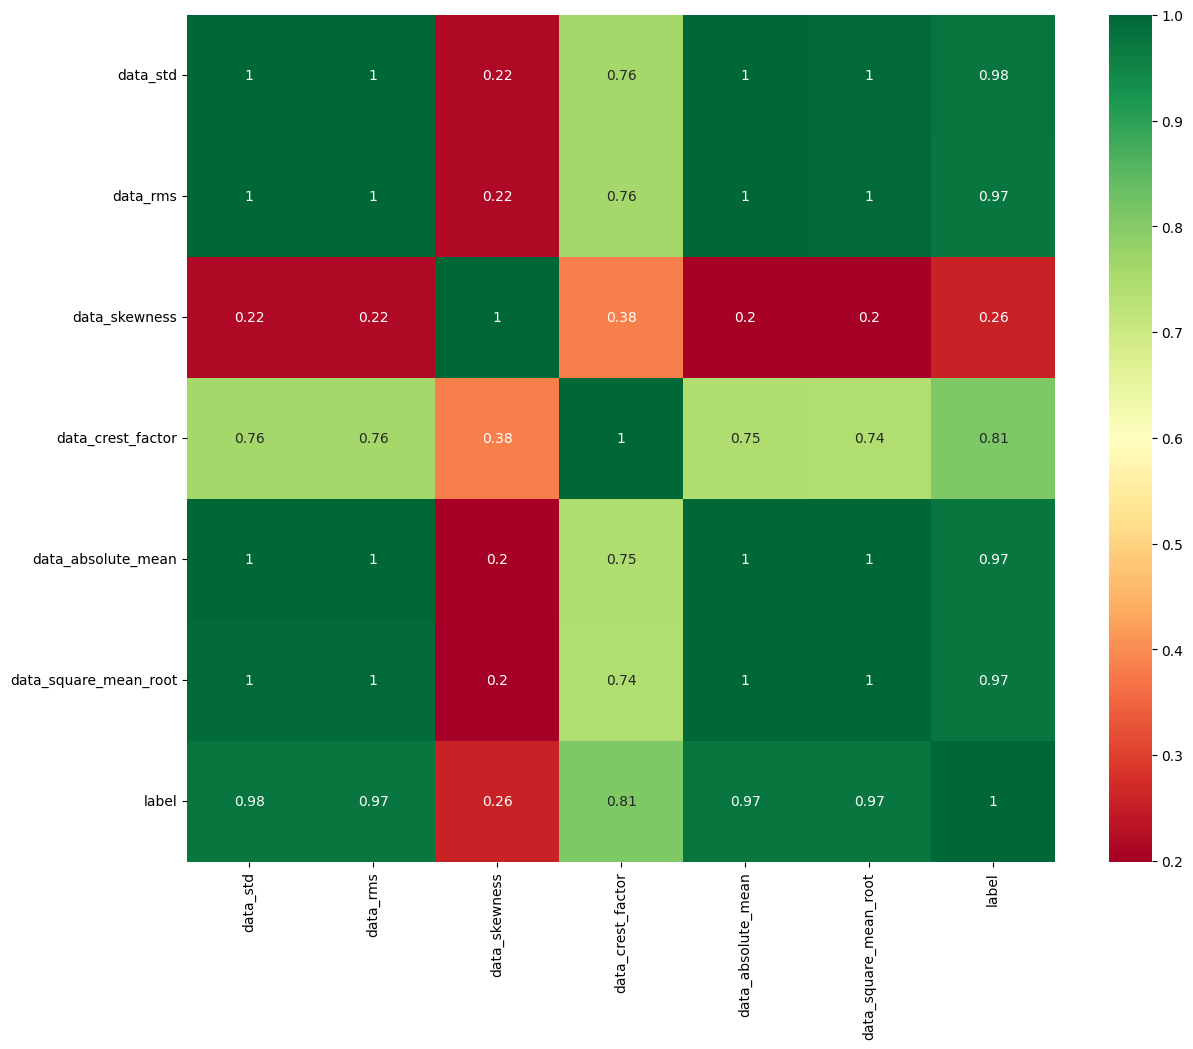

In [28]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 11
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

Exercise 2_3

In [ ]:
x_train = df_train[['data_std', 'data_rms', 'data_skewness', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root']].values
y_train = df_train[['label']].values
x_test= df_test[['data_std', 'data_rms', 'data_skewness', 'data_peak', 'data_crest_factor', 'data_absolute_mean','data_impact_factor','data_square_mean_root']].values
y_test=df_test[['label']].values
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(480, 6)
(480, 1)
(120, 6)
(120, 1)
